<h1>Chapter 5 - Text Clustering and Topic Modeling</h1>
<i>Clustering documents using a wide variety of language models.</i>

<a href="https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961"><img src="https://img.shields.io/badge/Buy%20the%20Book!-grey?logo=amazon"></a>
<a href="https://www.oreilly.com/library/view/hands-on-large-language/9781098150952/"><img src="https://img.shields.io/badge/O'Reilly-white.svg?logo=data:image/svg%2bxml;base64,PHN2ZyB3aWR0aD0iMzQiIGhlaWdodD0iMjciIHZpZXdCb3g9IjAgMCAzNCAyNyIgZmlsbD0ibm9uZSIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIj4KPGNpcmNsZSBjeD0iMTMiIGN5PSIxNCIgcj0iMTEiIHN0cm9rZT0iI0Q0MDEwMSIgc3Ryb2tlLXdpZHRoPSI0Ii8+CjxjaXJjbGUgY3g9IjMwLjUiIGN5PSIzLjUiIHI9IjMuNSIgZmlsbD0iI0Q0MDEwMSIvPgo8L3N2Zz4K"></a>
<a href="https://github.com/HandsOnLLM/Hands-On-Large-Language-Models"><img src="https://img.shields.io/badge/GitHub%20Repository-black?logo=github"></a>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HandsOnLLM/Hands-On-Large-Language-Models/blob/main/chapter05/Chapter%205%20-%20Text%20Clustering%20and%20Topic%20Modeling.ipynb)

---

This notebook is for Chapter 5 of the [Hands-On Large Language Models](https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961) book by [Jay Alammar](https://www.linkedin.com/in/jalammar) and [Maarten Grootendorst](https://www.linkedin.com/in/mgrootendorst/).

---

<a href="https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961">
<img src="https://raw.githubusercontent.com/HandsOnLLM/Hands-On-Large-Language-Models/main/images/book_cover.png" width="350"/></a>


### [OPTIONAL] - Installing Packages on <img src="https://colab.google/static/images/icons/colab.png" width=100>

If you are viewing this notebook on Google Colab (or any other cloud vendor), you need to **uncomment and run** the following codeblock to install the dependencies for this chapter:

---

💡 **NOTE**: We will want to use a GPU to run the examples in this notebook. In Google Colab, go to
**Runtime > Change runtime type > Hardware accelerator > GPU > GPU type > T4**.

---


In [1]:
%%capture
!pip install bertopic datasets openai datamapplot

# 5. [Book TOC -> Text Clustering and Topic Modeling](https://www.oreilly.com/library/view/hands-on-large-language/9781098150952/)

## ArXiv’s Articles: Computation and Language
## A Common Pipeline for Text Clustering
### Embedding Documents
### Reducing the Dimensionality of Embeddings
### Cluster the Reduced Embeddings
### Inspecting the Clusters
## From Text Clustering to Topic Modeling
### BERTopic: A Modular Topic Modeling Framework
### Adding a Special Lego Block
### The Text Generation Lego Block
## Summary



# **ArXiv Articles: Computation and Language**

In [2]:
# Load data from huggingface
from datasets import load_dataset
dataset = load_dataset("maartengr/arxiv_nlp")["train"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/617 [00:00<?, ?B/s]

data.csv:   0%|          | 0.00/53.2M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [3]:
# Extract metadata
abstracts = dataset["Abstracts"]
titles = dataset["Titles"]

# **A Common Pipeline for Text Clustering**

## **1. Embedding Documents**

In [4]:
from sentence_transformers import SentenceTransformer

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

What is the significane of SentenceTransformer?

My understnading is it is not a model in itself but a specific strategy to convert the text into relevant numerical form.

<details>
	<summary>	Answer by Gemini</summary>
  I'd be glad to provide a comprehensive explanation of SentenceTransformer's significance, incorporating the insights from the ratings:

**SentenceTransformer's Significance:**

- **Efficient Text Embedding:** SentenceTransformer is a powerful tool for transforming text into numerical representations, or embeddings, that capture semantic meaning. This process is crucial for various NLP tasks.
- **Semantic Similarity:** The embeddings produced by SentenceTransformer enable accurate measurement of semantic similarity between sentences or documents. This is invaluable for tasks like text classification, clustering, and information retrieval.
- **Diverse Model Architectures:** SentenceTransformer supports a wide range of model architectures, including BERT, RoBERTa, DistilBERT, and more. This flexibility allows you to choose the most suitable model for your specific task and resource constraints.
- **Pre-trained Models:** SentenceTransformer offers a collection of pre-trained models on various datasets, saving you time and effort in training from scratch. These models can be fine-tuned for your specific use case.
- **Customization:** You can customize SentenceTransformer by adjusting parameters like the number of layers, dropout rates, and learning rate to optimize performance for your particular task.
- **Integration with Other Tools:** SentenceTransformer can be easily integrated with other NLP frameworks and tools, such as spaCy and Gensim, to streamline your workflows.

**Addressing Misconceptions:**

- **Not a Model Itself:** While SentenceTransformer is not a model per se, it provides a framework for building and using text embedding models. It leverages pre-trained models or allows you to train your own.
- **Numerical Representation:** SentenceTransformer effectively converts text into numerical representations that capture semantic relationships. These embeddings are essential for downstream NLP tasks.

**Key Advantages:**

- **Efficiency:** SentenceTransformer is highly efficient, making it suitable for large-scale text processing applications.
- **Accuracy:** It produces accurate embeddings that can capture subtle semantic nuances.
- **Flexibility:** The framework offers flexibility in choosing models and customization options.
- **Ease of Use:** SentenceTransformer is relatively easy to use, with pre-trained models and clear documentation.

**In Summary:**

SentenceTransformer is a valuable tool for NLP tasks that require efficient and accurate text embedding. It provides a flexible framework for building and using models, enabling you to tackle various challenges in natural language understanding and processing.

</details>

Follow-up questions
Then why are we not using SentenceTransformer  as compared to LLMs? is there a difference between LLM and SentenceTransformer?
<details>
	<summary> answer by Gemini</summary>
  ## SentenceTransformer vs. LLMs: A Comparative Analysis

**SentenceTransformer** and **Large Language Models (LLMs)** are both powerful tools in the field of Natural Language Processing (NLP), but they serve different purposes and have distinct strengths and weaknesses.

### SentenceTransformer: A Focused Tool for Text Embeddings

* **Primary Function:** SentenceTransformer's primary goal is to create numerical representations (embeddings) of text. These embeddings capture the semantic meaning of the text, allowing for tasks like:
    * **Similarity Search:** Finding similar documents or sentences.
    * **Clustering:** Grouping similar texts together.
    * **Classification:** Categorizing text into predefined categories.
* **Efficiency:** SentenceTransformer is highly efficient, making it suitable for large-scale text processing tasks.
* **Focused:** It's specifically designed for embedding tasks and doesn't excel at other LLM capabilities like generating human-quality text or answering complex questions.

### LLMs: Versatile Language Models

* **Primary Function:** LLMs are designed to understand and generate human language. They can perform a wide range of tasks, including:
    * **Text Generation:** Creating human-quality text, such as articles, stories, and code.
    * **Question Answering:** Answering complex questions based on their understanding of the text.
    * **Translation:** Translating text from one language to another.
    * **Summarization:** Condensing long texts into shorter summaries.
* **Versatility:** LLMs are highly versatile and can be applied to a variety of NLP tasks.
* **Complexity:** They are more complex and computationally expensive than SentenceTransformer.

**Why Choose One Over the Other?**

* **Task-Specific:** If your primary goal is to create text embeddings for tasks like similarity search or clustering, SentenceTransformer is an excellent choice due to its efficiency and focus.
* **Broader Capabilities:** If you need a model that can perform a wide range of NLP tasks, such as text generation or question answering, an LLM is the better option.
* **Computational Resources:** LLMs are generally more computationally expensive to train and run than SentenceTransformer.

**In Summary:**

While both SentenceTransformer and LLMs are valuable tools in NLP, they serve different purposes. SentenceTransformer is a specialized tool for creating text embeddings, while LLMs are versatile models capable of a wide range of language tasks. The choice between the two depends on the specific requirements of your application.

</details>

In [7]:
# Create an embedding for each abstract
embedding_model = SentenceTransformer('thenlper/gte-small')

In [9]:
# embeddings = embedding_model.encode(abstracts, show_progress_bar=True)
embeddings = embedding_model.encode(abstracts, device='cuda', show_progress_bar=True)

Batches:   0%|          | 0/1405 [00:00<?, ?it/s]

In [ ]:
# Check the dimensions of the resulting embeddings
embeddings.shape

(44949, 384)

## **2. Reducing the Dimensionality of Embeddings**

In [12]:
from umap import UMAP

In [13]:
# We reduce the input embeddings from 384 dimenions to 5 dimenions
umap_model = UMAP(
    n_components=5, min_dist=0.0, metric='cosine', random_state=42
)


In [14]:
reduced_embeddings = umap_model.fit_transform(embeddings)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [15]:
reduced_embeddings

array([[ 1.7417371 , 10.014685  , -0.05307313,  5.307883  ,  1.9558533 ],
       [ 1.7529358 , 10.015824  , -0.04769716,  5.2960286 ,  1.9914092 ],
       [ 1.4776168 , 10.056184  ,  0.49908212,  5.2609468 ,  2.6169503 ],
       ...,
       [ 0.10626047, 10.716649  ,  0.44823366,  2.6441395 ,  3.7442029 ],
       [ 1.5575545 , 10.735951  ,  0.06427404,  3.968398  ,  3.2392726 ],
       [ 0.11061243, 10.713795  ,  0.4545517 ,  2.6433952 ,  3.7551467 ]],
      dtype=float32)

What exactly happens in teh UMAP? How does it reduces the dimentions? Coudl you explain it ?

<details>
	<summary>	Ansewr by Claude</summary>
  Certainly! I'd be happy to explain UMAP (Uniform Manifold Approximation and Projection) and how it reduces dimensions. UMAP is a powerful dimensionality reduction technique often used in machine learning and data visualization, particularly useful for high-dimensional data like text embeddings.

Here's a breakdown of what happens in UMAP:

1. Basic Concept:
   UMAP tries to find a lower-dimensional representation of your data while preserving the relationships between data points as much as possible.

2. How UMAP Works:
   a. It constructs a high-dimensional graph representation of your data.
   b. Then, it creates a similar graph in the lower-dimensional space.
   c. It optimizes this lower-dimensional graph to be as similar as possible to the high-dimensional one.

3. Dimension Reduction Process:
   - In your case, it's reducing 384-dimensional embeddings to 5 dimensions.
   - It does this by finding a 5-dimensional representation that best preserves the relationships between your data points in the original 384-dimensional space.

4. Parameters in Your Code:
   - `n_components=5`: This specifies the number of dimensions in the output (5 in this case).
   - `min_dist=0.0`: This controls how tightly UMAP is allowed to pack points together.
   - `metric='cosine'`: This specifies that cosine similarity should be used to measure distances between points.
   - `random_state=42`: This ensures reproducibility of the results.

5. Preservation of Structure:
   - UMAP tries to maintain both local and global structure of the data.
   - It's particularly good at preserving clusters and the overall topology of the data.

6. Non-Linear Dimensionality Reduction:
   - Unlike linear methods (like PCA), UMAP can capture non-linear relationships in the data.

7. Computational Efficiency:
   - UMAP is generally faster than other methods like t-SNE, especially for large datasets.

In your specific use case with text embeddings:
- The original embeddings (384 dimensions) capture complex semantic relationships between words or sentences.
- UMAP reduces this to 5 dimensions, which can be more easily visualized or used for further processing.
- The resulting 5-dimensional space still preserves much of the semantic structure present in the original embeddings.

This reduction is particularly useful for:
1. Visualization: You can plot the first 2 or 3 dimensions to see clusters of similar texts.
2. Computational efficiency: Further processing (like clustering) can be done more quickly on the reduced data.
3. Noise reduction: Sometimes, the reduction can help in filtering out noise present in the higher dimensions.

Remember, while UMAP is powerful, the reduction to very low dimensions (like 5) will inevitably lose some information. The trade-off is between preserving as much structure as possible and having a manageable number of dimensions for further analysis or visualization.
</details>

Follow -up Question

Could you explain the "How UMAP Works: a. It constructs a high-dimensional graph representation of your data. b. Then, it creates a similar graph in the lower-dimensional space. c. It optimizes this lower-dimensional graph to be as similar as possible to the high-dimensional one." with an example?

<details>
	<summary>Answer by Claude</summary>
  Certainly! I'd be happy to explain how UMAP works using a simplified example. Let's imagine we're working with word embeddings for a small vocabulary, and we want to reduce the dimensions for visualization.

Example: Reducing word embeddings from 3D to 2D

Let's say we have five words: "cat", "dog", "fish", "bird", and "snake". In our original space, each word is represented by a 3D vector (simplifying from the usual higher dimensions for clarity):

1. cat:   [1, 2, 1]
2. dog:   [1, 2, 2]
3. fish:  [3, 1, 2]
4. bird:  [2, 3, 1]
5. snake: [3, 1, 3]

Now, let's go through the UMAP process:

a. Constructing the high-dimensional graph:
   - UMAP first creates a graph where each word is a node.
   - It connects words based on their similarity (distance) in the 3D space.
   - For example, "cat" and "dog" might be strongly connected because they're close in the 3D space.
   - "fish" and "snake" might also be connected, but less strongly.
   - "bird" might have weaker connections to both the mammal group and the aquatic animal group.

The graph might look something like this (simplified):
```
   bird
    |  \
    |   \
  cat -- dog
    |     |
  fish -- snake
```

b. Creating a similar graph in lower-dimensional space:
   - UMAP then initializes a random 2D layout for these words.
   - It starts with a rough approximation, where the positions might not reflect the relationships well.

Initial 2D layout (random):
```
   dog    snake
      
 bird
    cat
       fish
```

c. Optimizing the lower-dimensional graph:
   - UMAP then iteratively adjusts the positions of the words in the 2D space.
   - It tries to make the connections in the 2D space as similar as possible to those in the original 3D space.
   - This is done through a force-directed graph layout algorithm.

The optimization process might go through several steps:

Step 1:
```
   dog  snake
     \  /
  bird--cat
       |
      fish
```

Step 2:
```
  dog--cat
   |    | \
 bird  fish-snake
```

Final optimized 2D layout:
```
  dog--cat
   |   /|
 bird / |
    /  fish
 snake
```

In this final layout:
- "cat" and "dog" are close, reflecting their similarity in the original space.
- "fish" and "snake" are also relatively close.
- "bird" is positioned between the mammal group and the aquatic group, reflecting its intermediate position in the original space.

This 2D representation preserves much of the structure of the original 3D space:
- Similar words are still close to each other.
- The overall relationships between groups of words are maintained.

In reality, UMAP is doing this with much higher dimensions (like 384 to 5 in your case) and with many more data points, making the process much more complex. But the fundamental idea remains the same: it's trying to create a lower-dimensional representation that preserves as much of the structure of the high-dimensional data as possible.

This reduced representation can then be used for visualization or as input to other algorithms, while still retaining much of the semantic information from the original word embeddings.
</details>

Follow up questions:

Can we use UMAP for numerical data? Or it can only we used for text? If yes, then can you give me simple example for the same?
<details>
	<summary>	Answer by Claude </summary>
  Certainly! I'll modify the code to include inference on new data and add some evaluation metrics. I'll also show you how to attempt to reconstruct the original dimensions, although it's important to note that this reconstruction is not perfect due to the information loss in dimensionality reduction.

Here's the modified code:

```python
import numpy as np
import pandas as pd
from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors

# Load the Auto MPG dataset
auto = fetch_openml(name='auto-mpg', version=1, as_frame=True)
X = auto.data
y = auto.target

# Select numerical features
features = ['horsepower', 'weight', 'acceleration', 'model year', 'mpg']
X = X[features]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply UMAP
umap_model = UMAP(n_components=2, random_state=42)
X_train_umap = umap_model.fit_transform(X_train_scaled)

# Inference on test set
X_test_umap = umap_model.transform(X_test_scaled)

# Evaluation: We'll use the nearest neighbor in the reduced space to predict MPG
nn_model = NearestNeighbors(n_neighbors=1)
nn_model.fit(X_train_umap, y_train)

# Find nearest neighbor for each test point
distances, indices = nn_model.kneighbors(X_test_umap)

# Predict MPG using the nearest neighbor
y_pred = y_train.iloc[indices.flatten()].values

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Attempt to reconstruct original dimensions
# Note: This is an approximation and won't perfectly recreate the original data
def umap_inverse_transform(umap_model, embedded_data):
    # Find the nearest neighbors in the embedded space
    nn = NearestNeighbors(n_neighbors=50, metric='euclidean')
    nn.fit(umap_model.embedding_)
    
    # For each point in embedded_data, find its nearest neighbors in the embedding
    distances, indices = nn.kneighbors(embedded_data)
    
    # Reconstruct the point as the weighted average of its neighbors in the original space
    weights = np.exp(-distances**2)
    weights_sum = np.sum(weights, axis=1, keepdims=True)
    weights /= weights_sum
    
    reconstructed = np.sum(weights[:, :, np.newaxis] * umap_model._raw_data[indices], axis=1)
    return reconstructed

# Reconstruct the test data
X_test_reconstructed = umap_inverse_transform(umap_model, X_test_umap)

# Inverse transform the reconstructed data
X_test_reconstructed = scaler.inverse_transform(X_test_reconstructed)

# Calculate reconstruction error
reconstruction_mse = mean_squared_error(X_test, X_test_reconstructed)
print(f"Reconstruction Mean Squared Error: {reconstruction_mse}")

# Visualize original vs reconstructed data for the first feature (horsepower)
plt.figure(figsize=(10, 6))
plt.scatter(X_test['horsepower'], X_test_reconstructed[:, 0], alpha=0.5)
plt.plot([X_test['horsepower'].min(), X_test['horsepower'].max()],
         [X_test['horsepower'].min(), X_test['horsepower'].max()], 'r--')
plt.xlabel('Original Horsepower')
plt.ylabel('Reconstructed Horsepower')
plt.title('Original vs Reconstructed Horsepower')
plt.show()
```

This modified code includes:

1. Inference: We use the trained UMAP model to transform the test data into the reduced space.

2. Evaluation: We use a simple nearest neighbor approach in the reduced space to predict MPG, and calculate the Mean Squared Error of these predictions.

3. Reconstruction: We attempt to reconstruct the original dimensions from the reduced space. This is done by:
   - Finding the nearest neighbors of each point in the embedded space.
   - Reconstructing each point as a weighted average of its neighbors in the original space.

4. Reconstruction Evaluation: We calculate the Mean Squared Error between the original and reconstructed data.

5. Visualization: We plot the original vs reconstructed values for one feature (horsepower) to visually assess the reconstruction quality.

Important notes:

1. The reconstruction is an approximation. UMAP, like many dimensionality reduction techniques, is not designed to be reversible. Some information is inevitably lost in the reduction process.

2. The quality of the reconstruction depends on various factors, including the complexity of your data and how much the dimensionality was reduced.

3. The evaluation method (using nearest neighbors to predict MPG) is quite simple and is just for demonstration. In a real scenario, you might use more sophisticated models on the reduced data.

4. The reconstruction method used here is a heuristic approach and not an official inverse transform method for UMAP. Its effectiveness can vary depending on your data.

This code provides a more complete pipeline, including training, inference, evaluation, and an attempt at reconstruction. It should give you a better understanding of how UMAP can be used with numerical data and some of its limitations.
</details>

## **3. Cluster the Reduced Embeddings**

In [10]:
from hdbscan import HDBSCAN

In [16]:
# We fit the model and extract the clusters
hdbscan_model = HDBSCAN(
    min_cluster_size=50, metric='euclidean', cluster_selection_method='eom'
).fit(reduced_embeddings)

In [17]:
clusters = hdbscan_model.labels_

In [19]:
type(clusters)

numpy.ndarray

In [21]:
import numpy as np

In [23]:
unique_values, counts = np.unique(clusters, return_counts=True)

In [25]:
# Create a dictionary from unique values and counts
count_dict = dict(zip(unique_values, counts))

# Print the result as a dictionary
# print("Counts:", count_dict)

count_dict

{-1: 14325,
 0: 87,
 1: 236,
 2: 119,
 3: 70,
 4: 59,
 5: 352,
 6: 97,
 7: 54,
 8: 197,
 9: 73,
 10: 189,
 11: 148,
 12: 76,
 13: 83,
 14: 167,
 15: 194,
 16: 226,
 17: 62,
 18: 80,
 19: 215,
 20: 159,
 21: 128,
 22: 52,
 23: 112,
 24: 56,
 25: 78,
 26: 78,
 27: 94,
 28: 312,
 29: 225,
 30: 197,
 31: 59,
 32: 144,
 33: 215,
 34: 169,
 35: 67,
 36: 94,
 37: 67,
 38: 246,
 39: 224,
 40: 56,
 41: 160,
 42: 218,
 43: 229,
 44: 120,
 45: 95,
 46: 155,
 47: 122,
 48: 680,
 49: 240,
 50: 59,
 51: 878,
 52: 258,
 53: 50,
 54: 113,
 55: 889,
 56: 127,
 57: 166,
 58: 67,
 59: 315,
 60: 202,
 61: 586,
 62: 56,
 63: 118,
 64: 106,
 65: 659,
 66: 1192,
 67: 119,
 68: 339,
 69: 74,
 70: 51,
 71: 92,
 72: 111,
 73: 61,
 74: 132,
 75: 245,
 76: 261,
 77: 154,
 78: 158,
 79: 154,
 80: 192,
 81: 168,
 82: 127,
 83: 140,
 84: 141,
 85: 135,
 86: 317,
 87: 55,
 88: 147,
 89: 2114,
 90: 263,
 91: 89,
 92: 477,
 93: 76,
 94: 52,
 95: 107,
 96: 348,
 97: 142,
 98: 95,
 99: 74,
 100: 198,
 101: 103,
 102: 87,

In [26]:
# How many clusters did we generate?
len(set(clusters))

153

## **Inspecting the Clusters**

Manually inspect the first three documents in cluster 0:

In [28]:
import numpy as np

In [29]:
# Print first three documents in cluster 0
cluster = 0
np.where(clusters==cluster) #returns the index of the clusters where the cluster number is 0

(array([  313,   319,   337,   339,   518,   768,   769,   776,   777,
         1073,  1741,  2437,  2534,  2996,  3991,  4460,  7471, 11676,
        11715, 12740, 13159, 13631, 14095, 14174, 14175, 16966, 19402,
        19723, 19807, 22548, 22641, 22865, 23257, 24030, 24392, 24609,
        24651, 25045, 25231, 25750, 25814, 25859, 26436, 26770, 26891,
        27653, 27680, 28969, 29035, 29085, 29106, 29601, 29900, 30532,
        30637, 31628, 31910, 32524, 33002, 33162, 33400, 33752, 34055,
        35105, 36132, 36160, 36365, 36499, 36522, 37072, 37606, 38061,
        38107, 38324, 38325, 38327, 38576, 38599, 39108, 39315, 40717,
        41447, 41661, 42088, 43092, 43116, 43198]),)

In [31]:
for index in np.where(clusters==cluster)[0][:3]: # new way of looping through the code
    print(abstracts[index][:300] + "... \n") # good way of printing the longs texts

  This works aims to design a statistical machine translation from English text
to American Sign Language (ASL). The system is based on Moses tool with some
modifications and the results are synthesized through a 3D avatar for
interpretation. First, we translate the input text to gloss, a written fo... 

  Researches on signed languages still strongly dissociate lin- guistic issues
related on phonological and phonetic aspects, and gesture studies for
recognition and synthesis purposes. This paper focuses on the imbrication of
motion and meaning for the analysis, synthesis and evaluation of sign lang... 

  Modern computational linguistic software cannot produce important aspects of
sign language translation. Using some researches we deduce that the majority of
automatic sign language translation systems ignore many aspects when they
generate animation; therefore the interpretation lost the truth inf... 



Next, we reduce our embeddings to 2-dimensions so that we can plot them and get a rough understanding of the generated clusters.

In [32]:
import pandas as pd

# Reduce 384-dimensional embeddings to 2 dimensions for easier visualization
reduced_embeddings = UMAP(
    n_components=2, min_dist=0.0, metric='cosine', random_state=42
).fit_transform(embeddings)

# Create dataframe
df = pd.DataFrame(reduced_embeddings, columns=["x", "y"])
df["title"] = titles
df["cluster"] = [str(c) for c in clusters]

# Select outliers and non-outliers (clusters)
clusters_df = df.loc[df.cluster != "-1", :]
outliers_df = df.loc[df.cluster == "-1", :]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


### Static Plot

(-8.205837416648865,
 11.125120806694031,
 -0.8646463111042977,
 16.545514668524266)

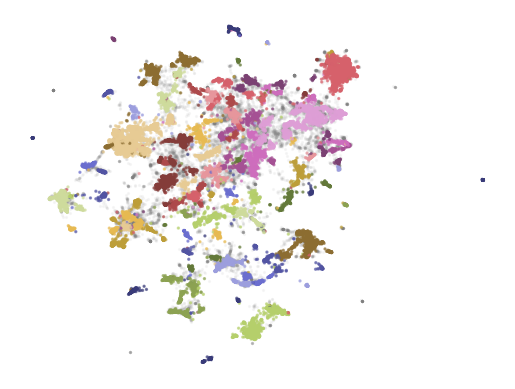

In [33]:
import matplotlib.pyplot as plt

# Plot outliers and non-outliers seperately
plt.scatter(outliers_df.x, outliers_df.y, alpha=0.05, s=2, c="grey")
plt.scatter(
    clusters_df.x, clusters_df.y, c=clusters_df.cluster.astype(int),
    alpha=0.6, s=2, cmap='tab20b'
)
plt.axis('off')

In [34]:
plt.savefig("matplotlib.png", dpi=300)  # Uncomment to save the graph as a .png

<Figure size 640x480 with 0 Axes>

# From Text Clustering to Topic Modeling

What is the differnece between Text Clustering and Topic Modeling?

<details>
	<summary>	Answer by Cluade</summary>
  Certainly! As an expert in LLMs and Hugging Face technologies, I'd be happy to explain the difference between Text Clustering and Topic Modeling. Both are important techniques in natural language processing and text analysis, but they serve different purposes and use different approaches.

Text Clustering:

1. Purpose: Text clustering is about grouping similar documents or texts together based on their content.

2. Approach: It uses similarity measures (like cosine similarity) to group texts that are close to each other in the vector space.

3. Output: The result is a set of clusters, where each cluster contains documents that are similar to each other.

4. Unsupervised: It's an unsupervised learning technique, meaning it doesn't require labeled data.

5. Example use case: Grouping news articles into categories like sports, politics, technology, etc.

6. Hugging Face implementation: You might use sentence-transformers to get embeddings, then apply a clustering algorithm like K-means.

```python
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts)
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(embeddings)
```

Topic Modeling:

1. Purpose: Topic modeling aims to discover abstract topics that occur in a collection of documents.

2. Approach: It looks for patterns of word co-occurrence across documents to identify themes.

3. Output: The result is a set of topics, where each topic is represented by a distribution over words, and each document is represented by a distribution over topics.

4. Unsupervised: Like clustering, it's also an unsupervised technique.

5. Example use case: Discovering the main themes discussed in a large corpus of scientific papers.

6. Hugging Face implementation: You might use the BERTopic library, which leverages BERT embeddings for topic modeling.

```python
from bertopic import BERTopic

topic_model = BERTopic()
topics, _ = topic_model.fit_transform(texts)
```

Key Differences:

1. Focus: Clustering focuses on grouping entire documents, while topic modeling focuses on discovering themes across documents.

2. Granularity: Clustering assigns each document to a single cluster, while topic modeling allows each document to be a mixture of multiple topics.

3. Interpretability: Topic models often provide more interpretable results, as they give you word distributions for each topic.

4. Flexibility: Topic modeling can capture that a document might be about multiple themes, which clustering typically doesn't do.

5. Use cases: Clustering is often used for document organization or search, while topic modeling is used for content analysis or thematic discovery.

In practice, you might use both techniques. For example, you could use topic modeling to discover themes in your corpus, then use clustering to group documents based on their topic distributions.

With Hugging Face's ecosystem, you can leverage powerful pre-trained language models for both tasks, often leading to more semantically meaningful results compared to traditional methods like TF-IDF with K-means for clustering or Latent Dirichlet Allocation (LDA) for topic modeling.
</details>

## **BERTopic: A Modular Topic Modeling Framework**

In [35]:
from bertopic import BERTopic # BERT version specifically for Topic modelling

[Link to official Site](https://maartengr.github.io/BERTopic/index.html)

In [36]:
# Train our model with our previously defined models
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
).fit(abstracts, embeddings)

2024-10-15 15:03:20,794 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-15 15:04:19,222 - BERTopic - Dimensionality - Completed ✓
2024-10-15 15:04:19,226 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-15 15:04:24,876 - BERTopic - Cluster - Completed ✓
2024-10-15 15:04:24,896 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-15 15:04:31,808 - BERTopic - Representation - Completed ✓


Now, let's start exploring the topics that we got by running the code above.

In [37]:
topic_model.get_topic_info()

Topic  Count                                          Name  \
0       -1  14325                              -1_the_of_and_to   
1        0   2114                0_question_qa_answer_questions   
2        1   2075                  1_speech_asr_recognition_end   
3        2   1192         2_medical_clinical_biomedical_patient   
4        3    909              3_translation_nmt_machine_neural   
..     ...    ...                                           ...   
148    147     53     147_prompt_prompts_optimization_prompting   
149    148     52        148_coherence_discourse_paragraph_text   
150    149     52          149_counseling_mental_therapy_health   
151    150     51  150_diffusion_generation_autoregressive_text   
152    151     50   151_opinion_reviews_summaries_summarization   

                                        Representation  \
0    [the, of, and, to, in, we, language, for, that...   
1    [question, qa, answer, questions, answering, a...   
2    [speech, asr, recognition, end, acoustic, spea...   
3    [medical, clinical, biomedical, patient, notes...   
4    [translation, nmt, machine, neural, bleu, engl...   
..                                                 ...   
148  [prompt, prompts, optimization, prompting, llm...   
149  [coherence, discourse, paragraph, text, cohesi...   
150  [counseling, mental, therapy, health, psychoth...   
151  [diffusion, generation, autoregressive, text, ...   
152  [opinion, reviews, summaries, summarization, r...   

                                   Representative_Docs  
0    [  We study the problem of building text class...  
1    [  In multi-hop QA, answering complex question...  
2    [  We introduce the Universal Speech Model (US...  
3    [  Clinical text provides essential informatio...  
4    [  Neural machine translation~(NMT) is ineffec...  
..                                                 ...  
148  [  Prompt optimization aims to find the best p...  
149  [  While there has been significant progress t...  
150  [  Mental health care poses an increasingly se...  
151  [  Diffusion models have achieved great succes...  
152  [  When faced with a large number of product r...  

[153 rows x 5 columns]

Hundreds of topics were generated using the default model! To get the top 10 keywords per topic as well as their c-TF-IDF weights, we can use the `get_topic()` function:

In [38]:
topic_model.get_topic(0)

[('question', 0.02194817482363572),
 ('qa', 0.016528096692201028),
 ('answer', 0.01646242138694385),
 ('questions', 0.016439633707498843),
 ('answering', 0.015251123923490635),
 ('answers', 0.010198054270247945),
 ('retrieval', 0.00957232274465297),
 ('comprehension', 0.008074006002320675),
 ('reading', 0.00750035197154994),
 ('hop', 0.006446690650992912)]

We can use the `find_topics()` function to search for specific topics based on a search term. Let’s search for a topic about topic modeling:

In [39]:
topic_model.find_topics("topic modeling")

([21, -1, 27, 33, 2],
 [0.95478904, 0.91128266, 0.9082118, 0.9053225, 0.90511835])

It returns that topic 22 has a relatively high similarity (0.95) with our search term. If we then inspect the topic, we can see that it is indeed a topic about topic modeling:

`DOUBT:` WHy 22 instead of 21? And why in the next step we use 22 instead of 21? That is `topic_model.find_topics("topic modeling")` returns 0-based indexing but while retrieving( get_topic) we are using the normal indexing like 22 ?

In [41]:
topic_model.get_topic(22)

[('adversarial', 0.0665667111000506),
 ('attacks', 0.034012154725906026),
 ('attack', 0.033281988143966906),
 ('robustness', 0.021940869352219793),
 ('examples', 0.019306167978665068),
 ('perturbations', 0.012729102648097871),
 ('defense', 0.011644484393284731),
 ('against', 0.009420176760679294),
 ('perturbation', 0.009366604272033957),
 ('nlp', 0.00915719123316064)]

That seems like a topic that is, in part, characterized by the classic LDA technique. Let's see if the BERTopic paper was also assigned to topic 22:

In [42]:
topic_model.topics_[titles.index('BERTopic: Neural topic modeling with a class-based TF-IDF procedure')]

21

It is! We expected it might be because there are non-LDA specific words in the topic describtion such as "clustering" and "topic".

### **Visualizations**

**Visualize Documents**

In [43]:
# Visualize topics and documents
fig = topic_model.visualize_documents(
    titles,
    reduced_embeddings=reduced_embeddings,
    width=1200,
    hide_annotations=True
)

# Update fonts of legend for easier visualization
fig.update_layout(font=dict(size=16))

In [44]:
# Visualize barchart with ranked keywords
topic_model.visualize_barchart()

# Visualize relationships between topics
topic_model.visualize_heatmap(n_clusters=30)

# Visualize the potential hierarchical structure of topics
topic_model.visualize_hierarchy()

## **Representation Models**

In these examples that follow, we will update our topic representations **after** having trained our model. This allows for quick iteration. If, however, you want to use a representation model at the start of training, you will need to run it as follows:

```python
from bertopic.representation import KeyBERTInspired
from bertopic import BERTopic

# Create your representation model
representation_model = KeyBERTInspired()

# Use the representation model in BERTopic on top of the default pipeline
topic_model = BERTopic(representation_model=representation_model)
```

To use the representation models, we are first going to duplicate our topic model such that easily show the differences between a model with and without representation model.

In [ ]:
# Save original representations
from copy import deepcopy
original_topics = deepcopy(topic_model.topic_representations_)

In [ ]:
def topic_differences(model, original_topics, nr_topics=5):
    """Show the differences in topic representations between two models """
    df = pd.DataFrame(columns=["Topic", "Original", "Updated"])
    for topic in range(nr_topics):

        # Extract top 5 words per topic per model
        og_words = " | ".join(list(zip(*original_topics[topic]))[0][:5])
        new_words = " | ".join(list(zip(*model.get_topic(topic)))[0][:5])
        df.loc[len(df)] = [topic, og_words, new_words]

    return df

### KeyBERTInspired

In [ ]:
from bertopic.representation import KeyBERTInspired

# Update our topic representations using KeyBERTInspired
representation_model = KeyBERTInspired()
topic_model.update_topics(abstracts, representation_model=representation_model)

# Show topic differences
topic_differences(topic_model, original_topics)

Topic                                           Original  \
0      0        speech | asr | recognition | end | acoustic   
1      1  medical | clinical | biomedical | patient | he...   
2      2  sentiment | aspect | analysis | reviews | opinion   
3      3        translation | nmt | machine | neural | bleu   
4      4  summarization | summaries | summary | abstract...   

                                             Updated  
0  speech | encoder | phonetic | language | trans...  
1       nlp | ehr | clinical | biomedical | language  
2  aspect | sentiment | aspects | sentiments | cl...  
3  translation | translating | translate | transl...  
4  summarization | summarizers | summaries | summ...

### Maximal Marginal Relevance

In [ ]:
from bertopic.representation import MaximalMarginalRelevance

# Update our topic representations to MaximalMarginalRelevance
representation_model = MaximalMarginalRelevance(diversity=0.5)
topic_model.update_topics(abstracts, representation_model=representation_model)

# Show topic differences
topic_differences(topic_model, original_topics)

Topic                                           Original  \
0      0        speech | asr | recognition | end | acoustic   
1      1  medical | clinical | biomedical | patient | he...   
2      2  sentiment | aspect | analysis | reviews | opinion   
3      3        translation | nmt | machine | neural | bleu   
4      4  summarization | summaries | summary | abstract...   

                                             Updated  
0            speech | asr | error | model | training  
1  clinical | biomedical | patient | healthcare |...  
2   sentiment | analysis | reviews | absa | polarity  
3  translation | nmt | bleu | parallel | multilin...  
4  summarization | document | extractive | rouge ...

## Text Generation



### Flan-T5

In [ ]:
from transformers import pipeline
from bertopic.representation import TextGeneration

prompt = """I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: '[KEYWORDS]'.

Based on the documents and keywords, what is this topic about?"""

# Update our topic representations using Flan-T5
generator = pipeline('text2text-generation', model='google/flan-t5-small')
representation_model = TextGeneration(
    generator, prompt=prompt, doc_length=50, tokenizer="whitespace"
)
topic_model.update_topics(abstracts, representation_model=representation_model)

# Show topic differences
topic_differences(topic_model, original_topics)

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

100%|██████████| 156/156 [01:28<00:00,  1.76it/s]


Topic                                           Original  \
0      0        speech | asr | recognition | end | acoustic   
1      1  medical | clinical | biomedical | patient | he...   
2      2  sentiment | aspect | analysis | reviews | opinion   
3      3        translation | nmt | machine | neural | bleu   
4      4  summarization | summaries | summary | abstract...   

                                             Updated  
0                  Speech-to-description |  |  |  |   
1                           Science/Tech |  |  |  |   
2                                 Review |  |  |  |   
3  Attention-based neural machine translation |  ...  
4                          Summarization |  |  |  |

### OpenAI

In [ ]:
import openai
from bertopic.representation import OpenAI

prompt = """
I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: [KEYWORDS]

Based on the information above, extract a short topic label in the following format:
topic: <short topic label>
"""

# Update our topic representations using GPT-3.5
client = openai.OpenAI(api_key="YOUR_KEY_HERE")
representation_model = OpenAI(
    client, model="gpt-3.5-turbo", exponential_backoff=True, chat=True, prompt=prompt
)
topic_model.update_topics(abstracts, representation_model=representation_model)

# Show topic differences
topic_differences(topic_model, original_topics)

100%|██████████| 156/156 [02:13<00:00,  1.17it/s]


Topic                                           Original  \
0      0        speech | asr | recognition | end | acoustic   
1      1  medical | clinical | biomedical | patient | he...   
2      2  sentiment | aspect | analysis | reviews | opinion   
3      3        translation | nmt | machine | neural | bleu   
4      4  summarization | summaries | summary | abstract...   

                                             Updated  
0  Leveraging External Data for Improving Low-Res...  
1  Improved Representation Learning for Biomedica...  
2  "Advancements in Aspect-Based Sentiment Analys...  
3            Neural Machine Translation Enhancements  
4                  Document Summarization Techniques

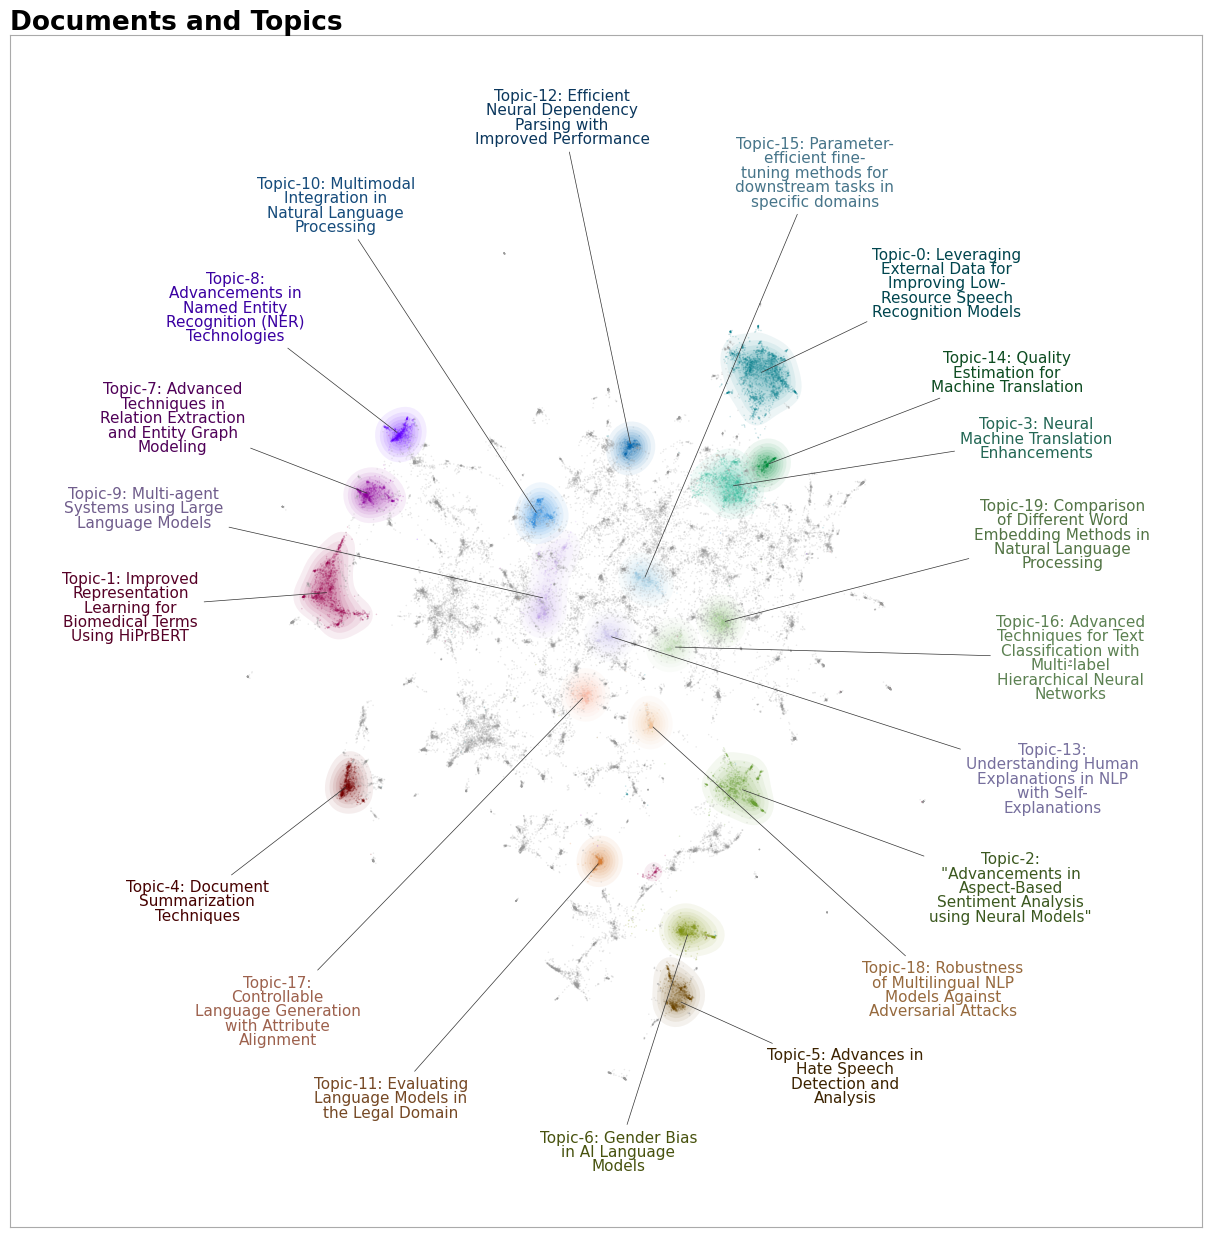

In [ ]:
# Visualize topics and documents
fig = topic_model.visualize_document_datamap(
    titles,
    topics=list(range(20)),
    reduced_embeddings=reduced_embeddings,
    width=1200,
    label_font_size=11,
    label_wrap_width=20,
    use_medoids=True,
)
plt.savefig("datamapplot.png", dpi=300)


## **BONUS**: Word Cloud

Make sure to pip install `wordcloud` first in order to follow this bonus:


First, we need to make sure that each topic is described by a bit more words than just 10 as that would make for a much more interesting wordcloud.

In [ ]:
topic_model.update_topics(abstracts, top_n_words=500)

Then, we can run the following code to generate the wordcloud for our topic modeling topic:

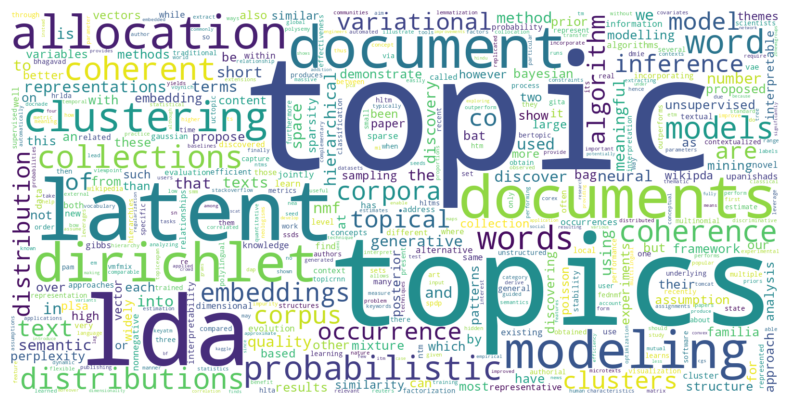

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    plt.figure(figsize=(10,5))
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000, width=1600, height=800)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model, topic=17)